In [3]:
# Standard scientific Python imports
%matplotlib inline
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets


In [13]:
# The digits dataset for training
digits = datasets.load_digits()

# The data is made of 8x8 images of digits
# zip the image and label (dependent variable) together
images_and_labels = list(zip(digits.images, digits.target))

digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [11]:
sum(map(len, images_and_labels))

3594

Number of images in the training set, N= 1797


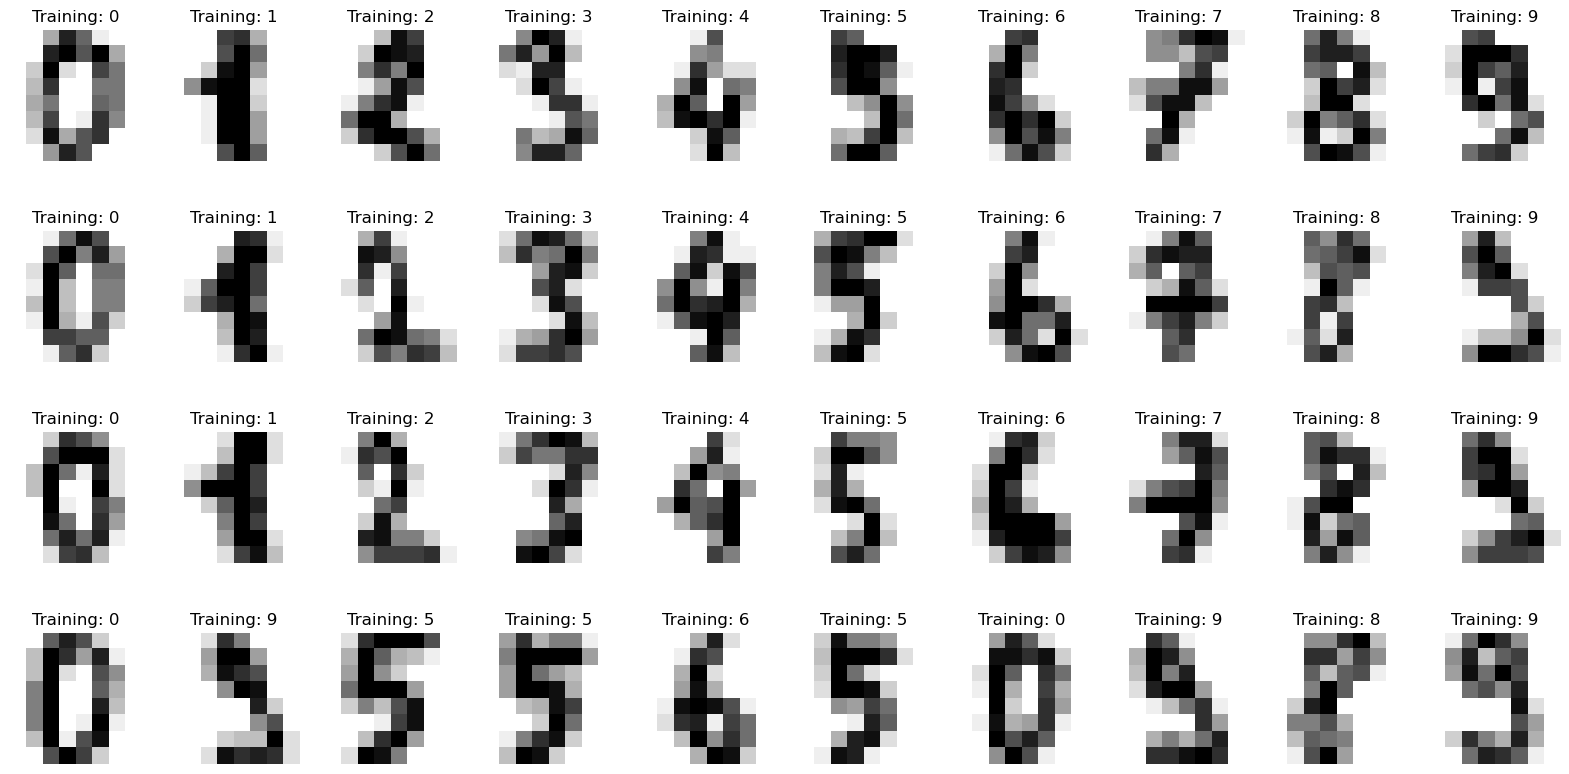

In [14]:
print(f'Number of images in the training set, N= {len(images_and_labels)}')
# Draw the first 40 data points - in this case a single data point is an image
plt.figure(1, figsize=(20, 10))
for index, (image, label) in enumerate(images_and_labels[:40]):
    plt.subplot(4, 10, index+1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Training: {label}')

In [13]:
# Check how the data looks like, examine the label as the last element, 1st data point, 2nd data point
print(images_and_labels[0])
print(images_and_labels[1])


(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]), 0)
(array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]), 1)


In [15]:
# Check the size of the data structures, data vectors, examine the indices
print(len(images_and_labels))
print(len(images_and_labels[0]))
print(len(images_and_labels[0][0]))
print(len(images_and_labels[0][0][0]))

images_and_labels[0][0]

1797
2
8
8


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [16]:
# To apply a classifier on this data, we need to flatten the image
# Turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

#print(f'N={len(data)}, M={len(data[0])}')

In [32]:
from sklearn import svm, metrics

# Create a classifier: a support vector classifier
# gamma is normally determined using a hyperparameter search which would need a validation dataset
classifier = svm.SVC(gamma=0.001)

# Learn the digits on the first half of the digits - 50% data is used as the training set
classifier.fit(data[:n_samples//2], digits.target[:n_samples//2])

# Predict the value of the digit on the second half
expected = digits.target[n_samples//2:]
predicted = classifier.predict(data[n_samples//2:])

In [10]:
%%time

acc = metrics.accuracy_score(expected, predicted)

print(f'Classification report for classifier {classifier}:\nAccuracy={acc:.3f}\n')

Classification report for classifier SVC(gamma=0.001):
Accuracy=0.969

CPU times: total: 0 ns
Wall time: 2 ms


In [11]:
print(f'Confusion matrix:\n{metrics.confusion_matrix(expected, predicted)}')


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


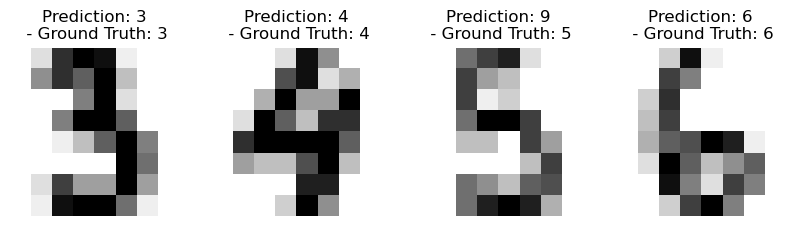

In [12]:
# Change the indices in images_and_predictions below to see more predictions
images_and_predictions = list(zip(digits.images[n_samples//2:], predicted))

plt.figure(1, figsize=(10, 10))
for index, (image, prediction) in enumerate(images_and_predictions[30:34]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Prediction: {prediction}\n - Ground Truth: {expected[index+30]}')

plt.show()

In [13]:
# Hyperparameter search
gamma_param = [1e-1, 1e-2, 1e-4, 1e-5]

classifiers = [svm.SVC(gamma=param) for param in gamma_param]

training, training_labels = data[:n_samples//2], digits.target[:n_samples//2]
testing, testing_labels = data[n_samples//2:], digits.target[n_samples//2:]

for clf in classifiers:
    clf.fit(training, training_labels)

predicteds = [clf.predict(testing) for clf in classifiers]

for i, clf in enumerate(classifiers):
    acc = metrics.accuracy_score(expected, predicteds[i])
    print(f'Model {i} (gamma={gamma_param[i]:.5f}) Accuracy={acc:.3f}')

Model 0 (gamma=0.10000) Accuracy=0.101
Model 1 (gamma=0.01000) Accuracy=0.697
Model 2 (gamma=0.00010) Accuracy=0.940
Model 3 (gamma=0.00001) Accuracy=0.798
